In [69]:
import pandas as pd
import numpy as np
import glob
import pickle
import seaborn as sns; sns.set()
from datetime import datetime
from matplotlib import pyplot as plt
import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV

from sklearn import tree
from sklearn.externals import joblib
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# ! pip install imblearn

In [70]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

# Read clean data

In [71]:
# pickle.load on your dataframe 
unpickled_h1_df = pd.read_pickle("cleandata.pkl")
unpickled_h1_df

,CASE_STATUS,EMPLOYER_NAME,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,VISA_CLASS,WILLFUL_VIOLATOR,PWAGE,EMPDAYS
1,1,UNIVERSITY OF OKLAHOMA,Y,NaN,ASSISTANT PROFESSOR,H-1B,N,42860.000000,1
3,1,"OMRON OILFIELD AND MARINE, INC.",Y,NaN,CONTROL ENGINEERING SPECIALIST,H-1B,N,65998.000000,1
4,1,FEDERAL HOME LOAN MORTGAGE CO.,Y,NaN,DEVELOPMENT SENIOR,H-1B,N,96907.000000,1
6,1,"VMWARE, INC.",Y,NaN,STAFF ENGINEER,H-1B,N,133976.000000,1
7,1,FEDERAL HOME LOAN MORTGAGE CORPORATION,Y,NaN,CREDIT GUARANTEE ANALYTICS SENIOR,H-1B,N,64085.000000,1
8,1,"VMWARE, INC.",Y,NaN,PROGRAMMER/ANALYST - SENIOR APPLICATIONS DEVEL...,H-1B,N,101900.000000,1
9,0,IMAEX TRADING COMPANY,N,NaN,COST ACCOUNTANT,H-1B,N,44920.000000,1
10,1,"VMWARE, INC.",Y,NaN,MEMBER OF TECHNICAL STAFF - SOFTWARE ENGINEERING,H-1B,N,98557.000000,1
11,0,"LHB, INC.",Y,NaN,F,H-1B,N,345000.000000,1
12,0,"INTERNATIONAL SOLUTIONS GROUP, INC.",Y,NaN,PROGRAMMER ANALYST,H-1B,N,66976.000000,1


In [72]:
number_cols = ['PWAGE','EMPDAYS']

Text(0.5,1,'Approved count 1 is approved and 0 is denied')

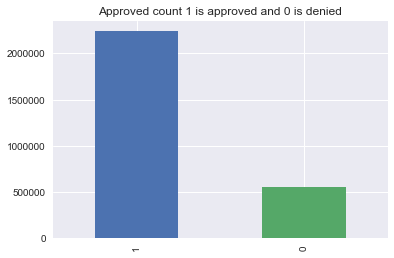

In [61]:
unpickled_h1_df.CASE_STATUS.value_counts().plot(kind="bar")
plt.title("Approved count 1 is approved and 0 is denied")

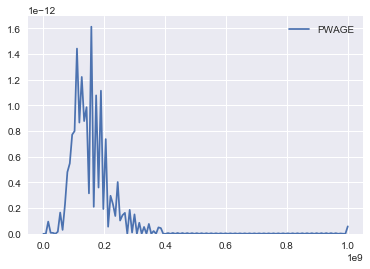

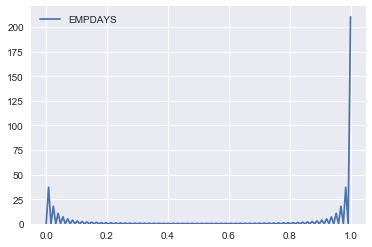

In [62]:
for col in number_cols:
    sns.kdeplot(unpickled_h1_df[col])
    plt.show()

In [73]:
category_cols =['FULL_TIME_POSITION','H1B_DEPENDENT','WILLFUL_VIOLATOR','VISA_CLASS']

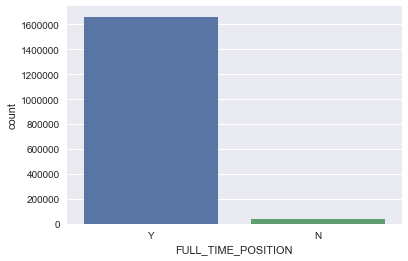

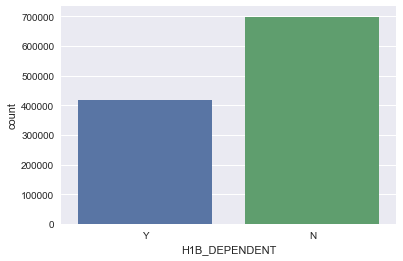

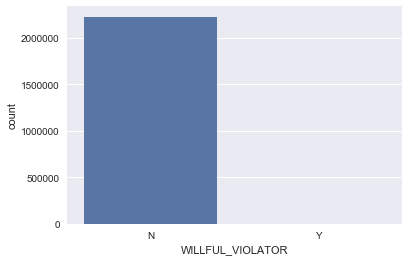

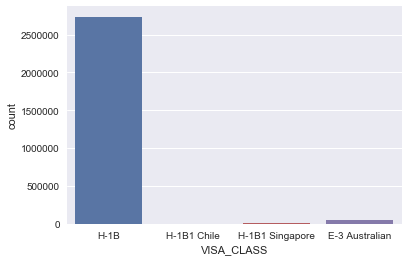

In [64]:
for col in category_cols:
    sns.countplot(col, data=unpickled_h1_df)
    plt.show()

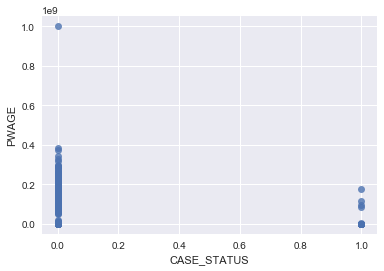

In [65]:
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
sns.regplot(x="CASE_STATUS", y="PWAGE", data=unpickled_h1_df, fit_reg=False, y_jitter=0.1)

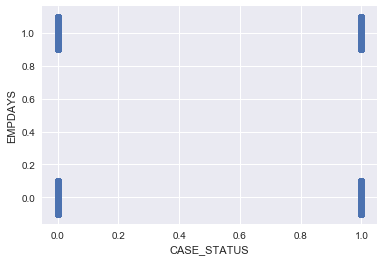

In [66]:
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
sns.regplot(x="CASE_STATUS", y="EMPDAYS", data=unpickled_h1_df, fit_reg=False, y_jitter=0.1)

In [67]:
def makeUniPlot(xinput):
    sns.regplot(x=xinput, y="CASE_STATUS", data=unpickled_h1_df, fit_reg=False, y_jitter=0.1, x_jitter=0.1, scatter_kws={"alpha": 0.2})
    plt.show()

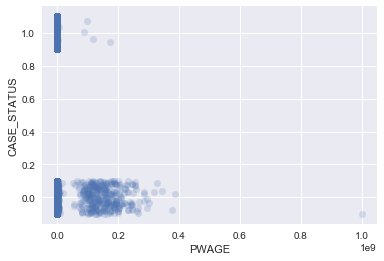

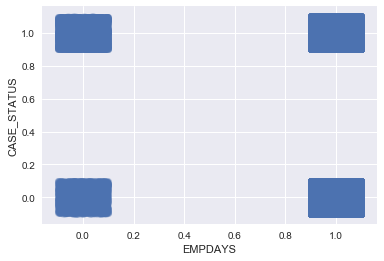

In [68]:
for col in number_cols:
    makeUniPlot(col)

# Training model

In [75]:
unpickled_h1_df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'FULL_TIME_POSITION', 'H1B_DEPENDENT',
       'JOB_TITLE', 'VISA_CLASS', 'WILLFUL_VIOLATOR', 'PWAGE', 'EMPDAYS'],
      dtype='object')

In [76]:
features = ['FULL_TIME_POSITION', 'H1B_DEPENDENT', 'VISA_CLASS','WILLFUL_VIOLATOR', 'PWAGE', 'EMPDAYS']

# features = ['H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'PWAGE', 'EMPDAYS']

In [77]:
X = unpickled_h1_df[features]
y = unpickled_h1_df[['CASE_STATUS']]

In [78]:
X_encoded = pd.get_dummies(X)

In [79]:
X_encoded.columns

Index(['PWAGE', 'EMPDAYS', 'FULL_TIME_POSITION_N', 'FULL_TIME_POSITION_Y',
       'H1B_DEPENDENT_N', 'H1B_DEPENDENT_Y', 'VISA_CLASS_E-3 Australian',
       'VISA_CLASS_H-1B', 'VISA_CLASS_H-1B1 Chile',
       'VISA_CLASS_H-1B1 Singapore', 'WILLFUL_VIOLATOR_N',
       'WILLFUL_VIOLATOR_Y'],
      dtype='object')

In [80]:
features_encoded = ['PWAGE', 'EMPDAYS', 'FULL_TIME_POSITION_N', 'FULL_TIME_POSITION_Y',
       'H1B_DEPENDENT_N', 'H1B_DEPENDENT_Y', 'VISA_CLASS_E-3 Australian',
       'VISA_CLASS_H-1B', 'VISA_CLASS_H-1B1 Chile',
       'VISA_CLASS_H-1B1 Singapore', 'WILLFUL_VIOLATOR_N',
       'WILLFUL_VIOLATOR_Y']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=0.5)

In [92]:
X_train.shape, X_test.shape

((1399406, 12), (1399406, 12))

In [93]:
y_train.shape, y_test.shape

((1399406, 1), (1399406, 1))

In [94]:
y_test.head()

,CASE_STATUS
2784331,0
1552423,1
1394098,1
749674,1
1811741,1


In [95]:
X_test.head()

,PWAGE,EMPDAYS,FULL_TIME_POSITION_N,FULL_TIME_POSITION_Y,H1B_DEPENDENT_N,H1B_DEPENDENT_Y,VISA_CLASS_E-3 Australian,VISA_CLASS_H-1B,VISA_CLASS_H-1B1 Chile,VISA_CLASS_H-1B1 Singapore,WILLFUL_VIOLATOR_N,WILLFUL_VIOLATOR_Y
2784331,101587.306799,1,0,0,0,0,0,1,0,0,0,0
1552423,42058.000000,1,0,1,1,0,0,1,0,0,1,0
1394098,71906.000000,1,0,1,0,1,0,1,0,0,1,0
749674,60445.000000,1,0,0,0,0,0,1,0,0,1,0
1811741,67829.000000,1,0,1,1,0,0,1,0,0,1,0


In [96]:
# normalize
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [97]:
sds

StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
joblib.dump(sds, "scaler.model")

['scaler.model']

In [99]:
from imblearn.under_sampling import RandomUnderSampler

In [100]:
params = {
    "max_depth": [4,6,8,10],
    "min_samples_split": [5, 9, 19],
    "min_samples_leaf": [5, 10],
    "max_leaf_nodes": [25, 50],
}

In [101]:
RandomUnderSampler

imblearn.under_sampling._prototype_selection._random_under_sampler.RandomUnderSampler

In [102]:
rus = RandomUnderSampler(random_state=2)
X_train_res2, y_train_res2 = rus.fit_sample(X_train, y_train)

In [103]:
sum(y_train_res2) / y_train_res2.shape[0]

array([0.5])

In [104]:
X_train_res2.shape

(556852, 12)

In [105]:
clf = DecisionTreeClassifier()
resampled_DTclf = GridSearchCV(clf, params, cv=5, verbose=0, n_jobs=1)
resampled_DTclf.fit(X_train_res2, y_train_res2.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'max_depth': [4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [5, 10], 'max_leaf_nodes': [25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
resampled_DTclf.best_params_


{'max_depth': 10,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [111]:
resampled_DTclf.score(X_test, y_test)

0.986452823555137

In [112]:
from sklearn.metrics import f1_score
f1_score(y_test, resampled_DTclf.predict(X_test))

0.9916068473391872

In [113]:
roc_auc_score(y_test, resampled_DTclf.predict(X_test))

0.9675049036960169

In [114]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]        
    else:
        1

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 99.89706060757435%


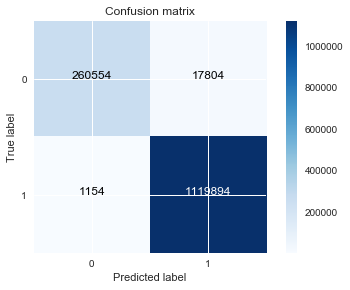

In [115]:
y_test_pre = resampled_DTclf.predict(X_test)

cnf_matrix_tra = confusion_matrix(y_test, y_test_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [118]:
from sklearn import tree

In [119]:
resampled_DTclf_2 = DecisionTreeClassifier(**resampled_DTclf.best_params_)

In [120]:
resampled_DTclf_2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
resampled_DTclf_2.fit(X_train_res2, y_train_res2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

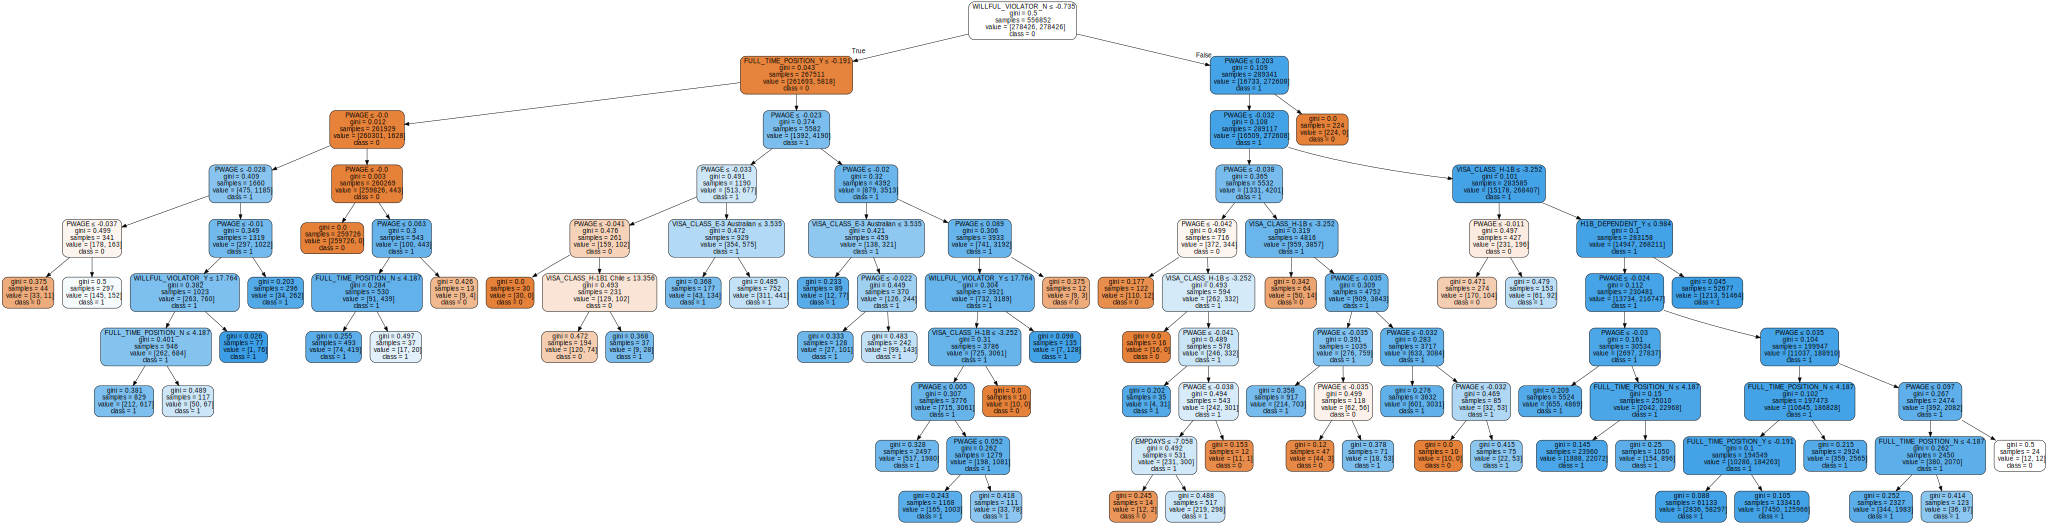

In [118]:
import graphviz 
dot_data = tree.export_graphviz(
    resampled_DTclf_2, out_file=None, 
    feature_names=features_encoded,  
    class_names=["0","1"],  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('h1btree.png')

graph = graphviz.Source(dot_data)  
graph 

In [122]:
filename = "./H1_status.model"

In [123]:
pickle.dump(resampled_DTclf, open(filename, "wb"))

In [124]:
!ls

alldata.csv
app.py
cleandata.pkl
DTC_model
H1_Data_Cleanup.ipynb
H1_DataCleanup.ipynb
H1_status.model
H1_StatusPredModel.ipynb
h1btree.png
Images
js
scaler.model
templates
unclean_alldata.csv


In [125]:
del resampled_DTclf